In [144]:
import sys
import os 
module_path = os.path.abspath(os.path.join('..')) 
if module_path not in sys.path: 
    sys.path.append(module_path)

import pandas as pd  
import numpy as np  

# import tools.Sample_Tools as smpl
# import tools.Pretreat_Tools as pretreat
from tools.Cacher import (CACHE_TYPE, save_cache,load_cache_adv,load_cache)



import matplotlib.pyplot as plt
# import seaborn as sns

from base.JuUnits import parallal_task,task_chunk_split
from base.JuUnits import excute_for_multidates

# import statsmodels.api as sm
from sklearn.decomposition import FactorAnalysis

# from scipy.optimize import minimize

# from QUANTAXIS.QAUtil import DATABASE
# from QUANTAXIS.QAUtil import  trade_date_sse
# from QUANTAXIS.QAUtil.QADate_trade import (
#     QA_util_get_pre_trade_date,
#     QA_util_get_next_trade_date,
#     QA_util_if_tradetime
# )

# import inspect

# from sklearn import linear_model
# import ind.alpha101 as a101


In [8]:
###加载数据

ids = np.arange(1,101)
# np.random.shuffle(ids)
files = list(map(lambda x:'alpha'+str(x)+'_train',ids))

def load_alpha_factors(file_names):
    from tools.Cacher import (CACHE_TYPE, save_cache,load_cache_adv,load_cache)
    from base.JuUnits import excute_for_multidates
    import numpy as np
    import pandas as pd 
    
    temp = []
    for file in file_names:
        print(file)
        temp.append(load_cache(file, cache_type=CACHE_TYPE.FACTOR))
    
    return pd.concat(temp,axis=1)
        
worker=6
task = task_chunk_split(files, worker)
results = parallal_task(worker, load_alpha_factors, task)
a101 = pd.concat(results,axis=1)

Now in the main code. Process name is: base.JuUnits
base.JuUnits, subpid:8020  pid:6004


  0%|          | 0/6 [00:00<?, ?it/s]

In [134]:
# removed = a101.columns.difference(['alpha61', 'alpha75','alpha95'],sort=False)
tmp = a101.loc[(slice('2018-01-04','2018-12-24'),'000001'),:][removed].dropna()


In [135]:
tmp2 = tmp[tmp.columns[0:10]].reset_index('code',drop=True)
tmp2 = (tmp2 - tmp2.mean())/tmp2.std()
tmp2

,alpha1,alpha2,alpha3,alpha4,alpha5,alpha6,alpha7,alpha8,alpha9,alpha10
date,,,,,,,,,,
2018-02-27,0.516515,1.308599,-0.984439,-0.132326,1.178833,-1.373379,0.085631,0.096772,1.437566,1.328143
2018-02-28,-0.144630,1.125771,0.086604,-0.132326,1.362434,0.205447,0.085631,-1.343060,0.916932,1.164145
2018-03-01,-0.753131,1.374152,0.534158,0.210165,1.418514,0.671252,0.085631,-1.271859,-0.037557,0.060161
2018-03-02,-1.330665,1.642982,-0.277188,0.552656,1.400273,-0.142587,0.085631,-1.493372,0.309528,-0.850493
2018-03-05,-0.753131,2.053894,-0.795275,0.895146,1.428326,-0.714004,0.085631,-1.511831,-0.471421,-0.857160
...,...,...,...,...,...,...,...,...,...,...
2018-12-18,-0.753131,0.445496,0.117329,1.066392,-0.384570,0.083661,0.085631,1.011830,0.668222,1.014814
2018-12-19,-1.330665,0.382575,0.797451,1.237637,-0.198343,0.788963,1.093049,0.953815,0.712292,1.041480
2018-12-20,-0.753131,0.897619,2.435159,1.237637,0.233126,2.415233,1.898983,1.172690,0.932633,1.172145


In [139]:
mod = sm.tsa.DynamicFactor(tmp2, k_factors=2, factor_order=2)
initial_res = mod.fit(method='powell', disp=True)
res = mod.fit(initial_res.params, disp=True)

print(res.summary(separate_params=False))
np.round((res.params[0:10*k_factors].values).reshape(-1,k_factors),2)
res.plot_coefficients_of_determination(figsize=(8,8));

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 11.259671
         Iterations: 44
         Function evaluations: 20844


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                     Statespace Model Results                                                                    
Dep. Variable:     ['alpha1', 'alpha2', 'alpha3', 'alpha4', 'alpha5', 'alpha6', 'alpha7', 'alpha8', 'alpha9', 'alpha10']   No. Observations:                  186
Model:                                                                                 DynamicFactor(factors=4, order=2)   Log Likelihood               -2411.398
Date:                                                                                                   Mon, 03 Jul 2023   AIC                           4986.796
Time:                                                                                                           21:47:45   BIC                           5251.307
Sample:                                                                                                                0   HQIC                          5093.986
                            

In [143]:
k_factors=2


array([[-0.04,  0.08],
       [-0.05, -0.23],
       [ 0.61,  0.26],
       [ 0.04, -0.19],
       [ 0.17, -0.07],
       [ 0.57,  0.25],
       [ 0.22, -0.07],
       [ 0.12, -0.11],
       [ 0.01, -0.03],
       [ 0.01, -0.01]])

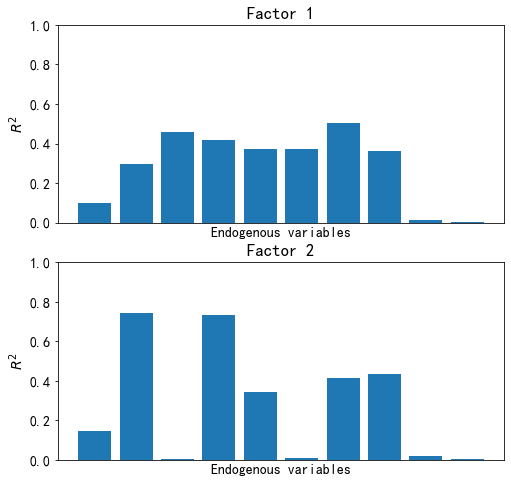